In [1]:
#importing data
import numpy as np
import pandas as pd

url='https://raw.githubusercontent.com/Nantha-1998/404-CODER/master/career_compute_dataset.csv'
dataset = pd.read_csv(url)
print(np.shape(dataset))
dataset.head()

(7525, 26)


,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,...,1,3,1,2,2,4,3,4,5,Technical Support
1,3,1,2,2,2,1,1,3,2,4,...,2,3,2,3,2,5,3,3,4,Software Developer
2,3,4,2,2,1,1,1,2,3,3,...,1,4,3,1,4,3,3,3,4,UI/UX Designer
3,3,4,2,1,1,1,1,1,3,2,...,1,3,2,1,2,1,4,4,3,Technical Support
4,2,3,2,4,1,1,1,4,3,3,...,1,2,1,3,1,5,4,3,1,Data Analyst


In [2]:
data = dataset.iloc[:49,:-1].values
label = dataset.iloc[:49,-1]
#-------------------------------Label Encoding--------------------------#
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df = dataset
label = df.iloc[:49,-1]
original=label.unique() 
label=label.values
label2 = labelencoder.fit_transform(label)
y=pd.DataFrame(label2,columns=["ROLE"])
numeric=y["ROLE"].unique() 
y1 = pd.DataFrame({'ROLE':original, 'Associated Number':numeric})
print(y1)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
label = labelencoder.fit_transform(label)
y=pd.DataFrame(label,columns=["role"])
X = pd.DataFrame(data,columns=['sslc','hsc','cgpa','school_type','no_of_miniprojects','no_of_projects',
                                'coresub_skill','aptitude_skill','problemsolving_skill','programming_skill','abstractthink_skill',
                                'design_skill','first_computer','first_program','lab_programs','ds_coding','technology_used',
                                'sympos_attend','sympos_won','extracurricular','learning_style','college_bench','clg_teachers_know','college_performence','college_skills'])

"""Thus, we have categorical data and categorical target.

For  Feature Selection : 

We propose to use: 

1. Chi-Squared Statistic.
2. Mutual Information Statistic.


"""

                 ROLE  Associated Number
0   Technical Support                  4
1  Software Developer                  2
2      UI/UX Designer                  6
3        Data Analyst                  1
4    Technical Writer                  5
5       Web Developer                  7
6     Software Tester                  3
7    Business Analyst                  0


'Thus, we have categorical data and categorical target.\n\nFor  Feature Selection : \n\nWe propose to use: \n\n1. Chi-Squared Statistic.\n2. Mutual Information Statistic.\n\n\n'

In [3]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

Feature 0: 2.101772
Feature 1: 0.955491
Feature 2: 1.599306
Feature 3: 1.769333
Feature 4: 3.316358
Feature 5: 1.125758
Feature 6: 1.299609
Feature 7: 6.225678
Feature 8: 1.013542
Feature 9: 1.529464
Feature 10: 6.433067
Feature 11: 3.607745
Feature 12: 0.611667
Feature 13: 1.566959
Feature 14: 0.907095
Feature 15: 4.838542
Feature 16: 1.000189
Feature 17: 2.309167
Feature 18: 2.526337
Feature 19: 3.994762
Feature 20: 3.109337
Feature 21: 0.519778
Feature 22: 0.356387
Feature 23: 0.116054
Feature 24: 5.677100


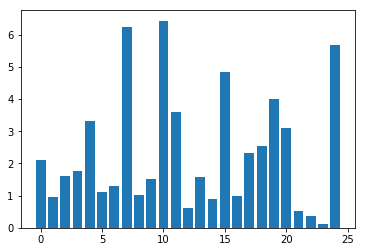

 The number of important features with threshold as 1 :19 
Feature 0: 2.647197
Feature 1: 0.606646
Feature 2: 0.987726
Feature 3: 3.816667
Feature 4: 2.366213
Feature 5: 1.146154
Feature 6: 1.424897
Feature 7: 4.506504
Feature 8: 1.653086
Feature 9: 1.386111
Feature 10: 3.688753
Feature 11: 2.377637
Feature 12: 1.653040
Feature 13: 1.869637
Feature 14: 0.573077
Feature 15: 2.759781
Feature 16: 1.664387
Feature 17: 2.188087
Feature 18: 3.249751
Feature 19: 4.095988
Feature 20: 1.730137
Feature 21: 0.844985
Feature 22: 0.326944
Feature 23: 0.498964
Feature 24: 7.232533


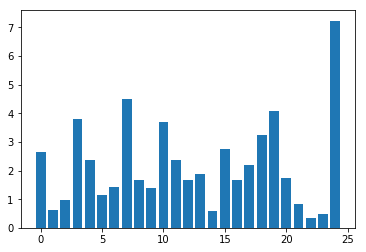

 The number of important features with threshold as 1 :19 


In [4]:
# feature selection
# example of chi squared feature selection for categorical data
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)#Decision tree
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.3,random_state=10)#XGBoost
X_train6,X_test6,y_train6,y_test6=train_test_split(X,y,test_size=0.2,random_state=15)#SVM

X_train1, X_test1, fs1 = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs3 = select_features(X_train2, y_train2, X_test2)
X_train5, X_test5, fs5 = select_features(X_train2, y_train2, X_test2)

# what are scores for the features
for i in range(len(fs1.scores_)):
	print('Feature %d: %f' % (i, fs1.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs1.scores_))], fs1.scores_)
pyplot.show()

count = 0
for i in fs1.scores_ : 
    if i > 1 : 
        count = count + 1
k1=count
print(" The number of important features with threshold as 1 :{} ".format(k1))


for i in range(len(fs3.scores_)):
	print('Feature %d: %f' % (i, fs3.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs3.scores_))], fs3.scores_)
pyplot.show()

count = 0
for i in fs3.scores_ : 
    if i > 1 : 
        count = count + 1
k3=count

print(" The number of important features with threshold as 1 :{} ".format(k3))

Feature 0: 2.647197
Feature 1: 0.606646
Feature 2: 0.987726
Feature 3: 3.816667
Feature 4: 2.366213
Feature 5: 1.146154
Feature 6: 1.424897
Feature 7: 4.506504
Feature 8: 1.653086
Feature 9: 1.386111
Feature 10: 3.688753
Feature 11: 2.377637
Feature 12: 1.653040
Feature 13: 1.869637
Feature 14: 0.573077
Feature 15: 2.759781
Feature 16: 1.664387
Feature 17: 2.188087
Feature 18: 3.249751
Feature 19: 4.095988
Feature 20: 1.730137
Feature 21: 0.844985
Feature 22: 0.326944
Feature 23: 0.498964
Feature 24: 7.232533


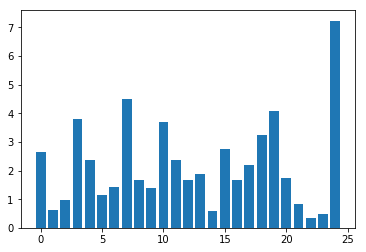

 The number of important features with threshold as 1 : 19


In [5]:
#X_train4, X_test4, fs = select_features(X_train2, y_train2, X_test2)
for i in range(len(fs5.scores_)):
	print('Feature %d: %f' % (i, fs5.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs5.scores_))], fs5.scores_)
pyplot.show()

count = 0
for i in fs5.scores_ : 
    if i > 1 : 
        count = count + 1
k5=count

print(" The number of important features with threshold as 1 : {}" .format(k5))

In [6]:
#Support Vector machine
from sklearn.metrics import confusion_matrix,accuracy_score
def svm(X_train,y_train,X_test,y_test):
  from sklearn.svm import SVC
  from pandas import read_csv
  from sklearn.model_selection import train_test_split

  # import metrics to compute accuracy
  from sklearn.metrics import accuracy_score
  svc=SVC() 
  # fit classifier to training set
  svc.fit(X_train,y_train)
  # make predictions on test set
  y_pred=svc.predict(X_test)
  # compute and print accuracy score
  print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))
  return accuracy_score(y_test, y_pred)*100

def Dec_tree(X_train,y_train,X_test,y_test):
  from sklearn import tree
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X_train, y_train)
  # Prediction
  y_pred = clf.predict(X_test)
  y_test_arr=y_test['role']
  from sklearn.metrics import confusion_matrix,accuracy_score
  accuracy = accuracy_score(y_test,y_pred)
  print('Model accuracy score with Decision Tree', accuracy_score(y_test, y_pred)*100)
  return accuracy*100,clf

def xgboost(X_train,y_train,X_test,y_test,clf):
  #X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=10)
  shape = X_train.shape
  X_train=pd.to_numeric(X_train.values.flatten())
  X_train=X_train.reshape(shape)
  from xgboost.sklearn import XGBClassifier
  model = XGBClassifier()
  model.fit(X_train, y_train)
  xgb_y_pred  = clf.predict(X_test)
  xgb_accuracy = accuracy_score(y_test,xgb_y_pred)
  print("accuracy=",xgb_accuracy*100)
  return xgb_accuracy*100

In [7]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2,k=k1)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features2(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2,k=k3)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features3(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2,k=k5)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train1, X_test1, fs = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs = select_features2(X_train2, y_train2, X_test2)
X_train5, X_test5, fs = select_features3(X_train6, y_train6, X_test6)

 
#---------------SVM------------------#
#
print("Without feature Selection : ")
acc = svm(X_train6,y_train6,X_test6,y_test6)

print("With feature Selection : ")
acc1 = svm(X_train5,y_train6,X_test5,y_test6)

#-------------Decision Tree-----------------#
print("Without feature Selection : ")
acc1,clf1 = Dec_tree(X_train1,y_train,X_test1,y_test)


print("With feature Selection : ")
acc,clf = Dec_tree(X_train,y_train,X_test,y_test)

print(' ')

#-------------XGBoost-----------------#
print("Boosting the Decision Tree  ")
acc = xgboost(X_train2,y_train2,X_test2,y_test2,clf)

Without feature Selection : 


C:\Users\Swasti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Swasti\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Swasti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Swasti\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.2

Model accuracy score with default hyperparameters: 60.0000
With feature Selection : 
Model accuracy score with default hyperparameters: 70.0000
Without feature Selection : 
Model accuracy score with Decision Tree 30.0
With feature Selection : 
Model accuracy score with Decision Tree 40.0
 
Boosting the Decision Tree  


C:\Users\Swasti\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Swasti\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Swasti\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[21:24:26] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy= 93.33333333333333


C:\Users\Swasti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Swasti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Swasti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 1.939425
Feature 1: 0.621032
Feature 2: 1.190205
Feature 3: 2.361067
Feature 4: 2.723434
Feature 5: 1.019886
Feature 6: 1.630621
Feature 7: 5.962755
Feature 8: 0.948673
Feature 9: 1.391667
Feature 10: 3.995109
Feature 11: 3.001412
Feature 12: 1.301361
Feature 13: 1.730517
Feature 14: 0.916034
Feature 15: 2.627847
Feature 16: 0.703328
Feature 17: 2.405423
Feature 18: 3.379566
Feature 19: 3.567291
Feature 20: 2.512279
Feature 21: 1.074299
Feature 22: 0.271954
Feature 23: 0.452889
Feature 24: 8.890845


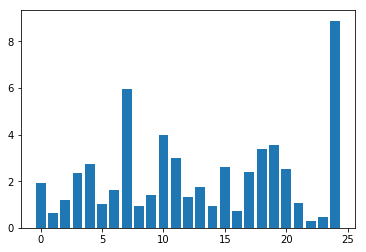

 The number of important features with threshold as 0.2 :25 
Feature 0: 0.220000
Feature 1: 0.000000
Feature 2: 0.034157
Feature 3: 0.057348
Feature 4: 0.795449
Feature 5: 1.300140
Feature 6: 0.561509
Feature 7: 0.233968
Feature 8: 0.000000
Feature 9: 0.000000
Feature 10: 0.343849
Feature 11: 0.291365
Feature 12: 0.672854
Feature 13: 0.251091
Feature 14: 2.222168
Feature 15: 0.032922
Feature 16: 1.632602
Feature 17: 0.347395
Feature 18: 0.129276
Feature 19: 0.134136
Feature 20: 0.239369
Feature 21: 0.124970
Feature 22: 0.440040
Feature 23: 0.136166
Feature 24: 0.234215


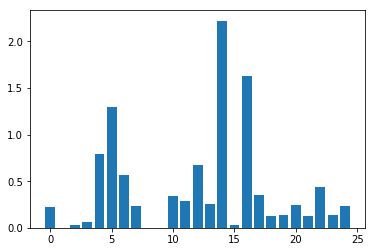

 The number of important features with threshold as 0.2 :15 
Feature 0: 0.169750
Feature 1: 0.071522
Feature 2: 0.282549
Feature 3: 0.169716
Feature 4: 1.166629
Feature 5: 1.555651
Feature 6: 0.875705
Feature 7: 0.191024
Feature 8: 0.000000
Feature 9: 0.000000
Feature 10: 0.040739
Feature 11: 0.157003
Feature 12: 0.893455
Feature 13: 0.460487
Feature 14: 1.999021
Feature 15: 0.000000
Feature 16: 1.268126
Feature 17: 0.000000
Feature 18: 0.263816
Feature 19: 0.260722
Feature 20: 0.190540
Feature 21: 0.136414
Feature 22: 0.467211
Feature 23: 0.034001
Feature 24: 0.156147


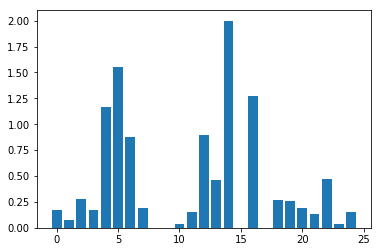

 The number of important features with threshold as 0.2 : 11


In [8]:
# example of mutual information feature selection for categorical data
from sklearn.feature_selection import mutual_info_classif

def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)#Decision tree
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.3,random_state=10)#XGBoost
X_train6,X_test6,y_train6,y_test6=train_test_split(X,y,test_size=0.2,random_state=15)#SVM

X_train1, X_test1, fs1 = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs3 = select_features(X_train2, y_train2, X_test2)
X_train5, X_test5, fs5 = select_features(X_train2, y_train2, X_test2)

# what are scores for the features
for i in range(len(fs1.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

count = 0
for i in fs.scores_ : 
    if i > 0.2 : 
        count = count + 1
k1=count
print(" The number of important features with threshold as 0.2 :{} ".format(k1))


for i in range(len(fs3.scores_)):
	print('Feature %d: %f' % (i, fs3.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs3.scores_))], fs3.scores_)
pyplot.show()

count = 0
for i in fs3.scores_ : 
    if i > 0.2 : 
        count = count + 1
k3=count

print(" The number of important features with threshold as 0.2 :{} ".format(k3))

#X_train4, X_test4, fs = select_features(X_train2, y_train2, X_test2)
for i in range(len(fs5.scores_)):
	print('Feature %d: %f' % (i, fs5.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs5.scores_))], fs5.scores_)
pyplot.show()

count = 0
for i in fs5.scores_ : 
     if i > 0.2 : 
        count = count + 1
k5=count

print(" The number of important features with threshold as 0.2 : {}" .format(k5))

In [9]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif,k=k1)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features2(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif,k=k3)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def select_features3(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif,k=k5)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


X_train1, X_test1, fs = select_features(X_train, y_train, X_test)
X_train3, X_test3, fs = select_features2(X_train2, y_train2, X_test2)
X_train5, X_test5, fs = select_features3(X_train6, y_train6, X_test6)
#---------------SVM------------------#
#
print("Without feature Selection : ")
acc = svm(X_train6,y_train6,X_test6,y_test6)

print("With feature Selection : ")
acc1 = svm(X_train5,y_train6,X_test5,y_test6)

#-------------Decision Tree-----------------#
print("Without feature Selection : ")
acc1,clf1 = Dec_tree(X_train1,y_train,X_test1,y_test)


print("With feature Selection : ")
acc,clf = Dec_tree(X_train,y_train,X_test,y_test)

print(' ')

#-------------XGBoost-----------------#
print("Boosting the Decision Tree  ")
acc = xgboost(X_train2,y_train2,X_test2,y_test2,clf)

C:\Users\Swasti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Swasti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Swasti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Swasti\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Without feature Selection : 
Model accuracy score with default hyperparameters: 60.0000
With feature Selection : 
Model accuracy score with default hyperparameters: 70.0000
Without feature Selection : 
Model accuracy score with Decision Tree 30.0
With feature Selection : 
Model accuracy score with Decision Tree 40.0
 
Boosting the Decision Tree  
[21:26:13] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy= 93.33333333333333


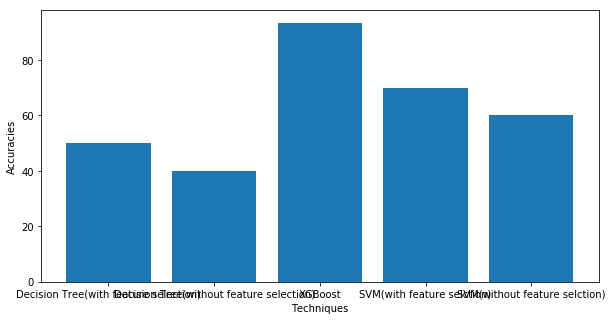

In [10]:
import matplotlib.pyplot as plt
#fig = plt.figure()
fig = plt.figure(figsize =(10, 5)) 
#ax = fig.add_axes([0,0,1,1])
Name = ['Decision Tree(with feature selection)','Decision Tree(without feature selection)', 'XGBoost', 'SVM(with feature selction)','SVM(without feature selction)']
accuracies = [50,40,93.333,70,60]
plt.bar(Name,accuracies)
plt.ylabel('Accuracies')
plt.xlabel('Techniques')
plt.show()

In [11]:
# x_new = ['3','5','4','3','5','4','3','5','2','2','5','2','5','4','2','5','5','3','2','5','5','4','2','3','4']
x_new = []
feat = list(X.columns) 
for i in feat:
  print(i)
  val = input("Enter: ") 
  x_new.append(val)
x_new

sslc
Enter: 3
hsc
Enter: 5
cgpa
Enter: 4
school_type
Enter: 3
no_of_miniprojects
Enter: 5
no_of_projects
Enter: 4
coresub_skill
Enter: 3
aptitude_skill
Enter: 5
problemsolving_skill
Enter: 2
programming_skill
Enter: 2
abstractthink_skill
Enter: 5
design_skill
Enter: 2
first_computer
Enter: 5
first_program
Enter: 4
lab_programs
Enter: 2
ds_coding
Enter: 5
technology_used
Enter: 5
sympos_attend
Enter: 3
sympos_won
Enter: 2
extracurricular
Enter: 5
learning_style
Enter: 5
college_bench
Enter: 4
clg_teachers_know
Enter: 2
college_performence
Enter: 3
college_skills
Enter: 4


['3',
 '5',
 '4',
 '3',
 '5',
 '4',
 '3',
 '5',
 '2',
 '2',
 '5',
 '2',
 '5',
 '4',
 '2',
 '5',
 '5',
 '3',
 '2',
 '5',
 '5',
 '4',
 '2',
 '3',
 '4']

In [12]:
#x_new = ['3','5','4','3','5','4','3','5','2','2','5','2','5','4','2','5','5','3','2','5','5','4','2','3','4']
new_pred  = clf.predict([x_new])
print("Prediction : {}".format(y1[y1['Associated Number']==new_pred[0]]['ROLE']))

Prediction : 4    Technical Writer
Name: ROLE, dtype: object
